In [1]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at D:\Dropbox\31_Projekte\01_Python\libs
Start Time: 20:17:02


time: 868 ms


# Scale Numbers
* `scale`: Scales all values of a numeric series to a defined value range.<br>
   Available methods: max_abs, min_max, min_max_robust, rel, mean, median, 
   compare_median, rank and random.

In [2]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import pandasklar as pak 
import random

time: 4.1 s


In [3]:
?pak.scale

time: 449 ms


Signature: pak.scale(series, method, powerfactor=1, almostzero=1e-08, verbose=None)
Docstring:
Scales all values of a numeric series to a defined value range.
* method must be 'max_abs','min_max','min_max_robust',
  'rel','mean','median','compare_median','rank' or 'random'
* powerfactor is an additional parameter for scaling 'rank'

## scale method='max_abs'
* scales every value with a fixed factor
* one finds: Every scaled value is somewhere in the range -1..1
* series_scaled.max() is often 1
* series_scaled.min() can be anything -1..0.999    

## scale method='min_max'
* forces all scaled values to fit the full range 0..1 (closed interval)
* one finds: series_scaled.min() == 0
* one finds: series_scaled.max() == 1 if there are more than 2 different values

## scale method='min_max_robust'
* like min_max, but robust against outlier values. 
  Works with quantile(0.01) and quantile(0.99) instead of min() and max().
  The scaling is therefore not determined by the outliers.
* scales 98%

In [4]:
?pak.random_series

time: 356 ms


Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many decimal pl

min = -12.060644951923683
max = -2.8609636087629635


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

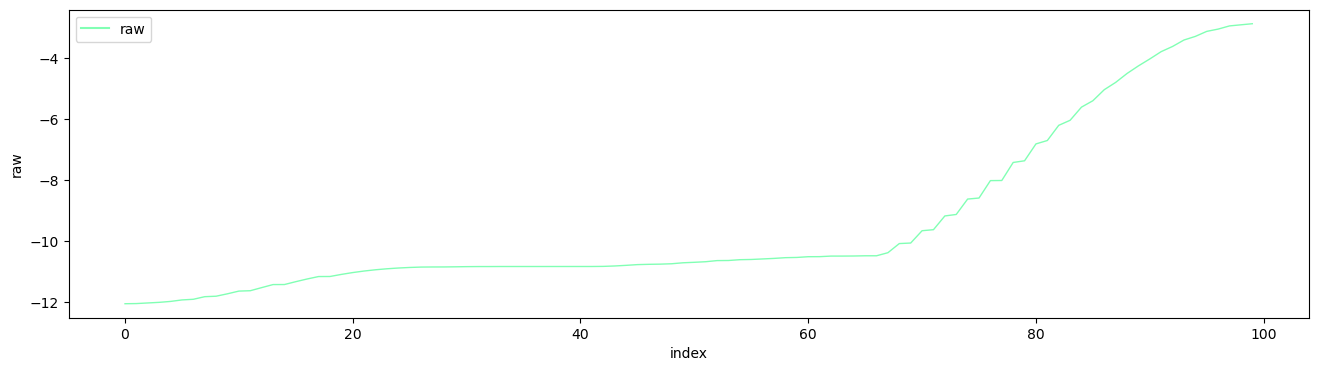

time: 1.34 s


In [5]:
# Create raw data with ugly scaling

def create_raw():
    typ = random.choice([ 'a','d'])
    raw = pak.random_series(100, typ, name='raw') 
    raw = pak.scale(raw, 'random')    
    df = pak.dataframe(raw)
    return df


# display
df = create_raw()
print(  'min =',df.raw.min() )
print(  'max =',df.raw.max() )
%matplotlib inline
pak.plot(df)

In [6]:
# show statistics for raw and scaled data

def analyse():
    a = pak.analyse_values(df) #.set_index('col_name')
    spalten = ['col_name','vmin','vmean','vmedian','vmax','vsum']
    a = a[spalten] 
    mask = ~a.col_name.isin(['__index__','x'])
    return a[mask].set_index('col_name')

analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38


time: 378 ms


## scale method='max_abs'
* scales every value with a fixed factor
* one finds: Every scaled value is somewhere in the range `-1..1`
* series_scaled.max() is often `1`
* series_scaled.min() can be anything `-1..0.999`

In [7]:
# scale
df['max_abs'] = pak.scale( df.raw, 'max_abs')

time: 318 ms


In [8]:
# assert
assert (df.max_abs >= -1).all()
assert (df.max_abs <=  1).all()

time: 382 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

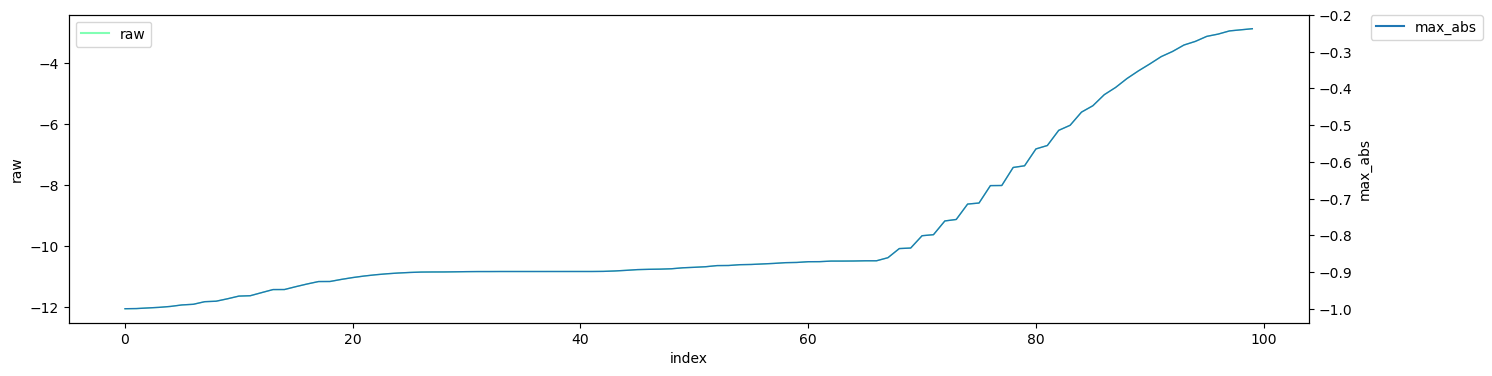

time: 2.42 s


In [9]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.max_abs )

In [10]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14


time: 385 ms


## scale method='min_max'
* forces all scaled values to fit the full range `0..1` (closed interval)
* one finds: `series_scaled.min() == 0`
* one finds: `series_scaled.max() == 1`

In [11]:
# scale
df['min_max'] = pak.scale( df.raw, 'min_max')

time: 382 ms


In [12]:
# assert
assert df.min_max.min() == 0
assert df.min_max.max() == 1

time: 344 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

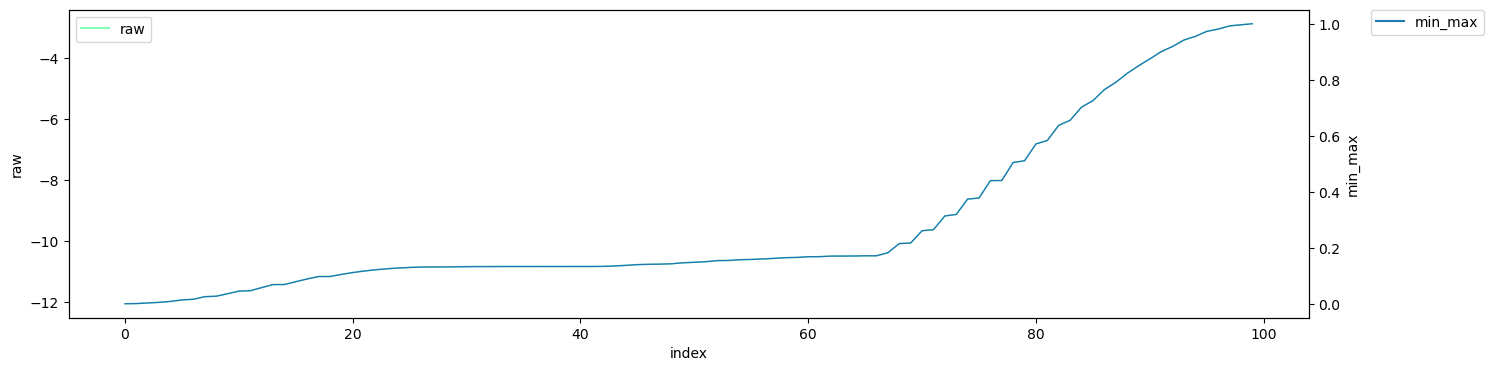

time: 1.99 s


In [13]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.min_max )

In [14]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66


time: 439 ms


## scale method='min_max_robust'
* like `min_max`, but robust against outlier values. 
  Works with `quantile(0.01)` and `quantile(0.99)` instead of `min()` and `max()`.
  The scaling is therefore not determined by the outliers.
* scales 98% of the values to fit the range `0..1`
* one finds: `series_scaled.min() <= 0` but not much lower  than -0.02 normally
* one finds: `series_scaled.max() >= 1` but not much higher than  1.02 normally

In [15]:
# scale
df['min_max_robust'] = pak.scale( df.raw, 'min_max_robust')

time: 429 ms


In [16]:
# assert
assert df.min_max_robust.min() <= 0
assert df.min_max_robust.max() >= 1

time: 351 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

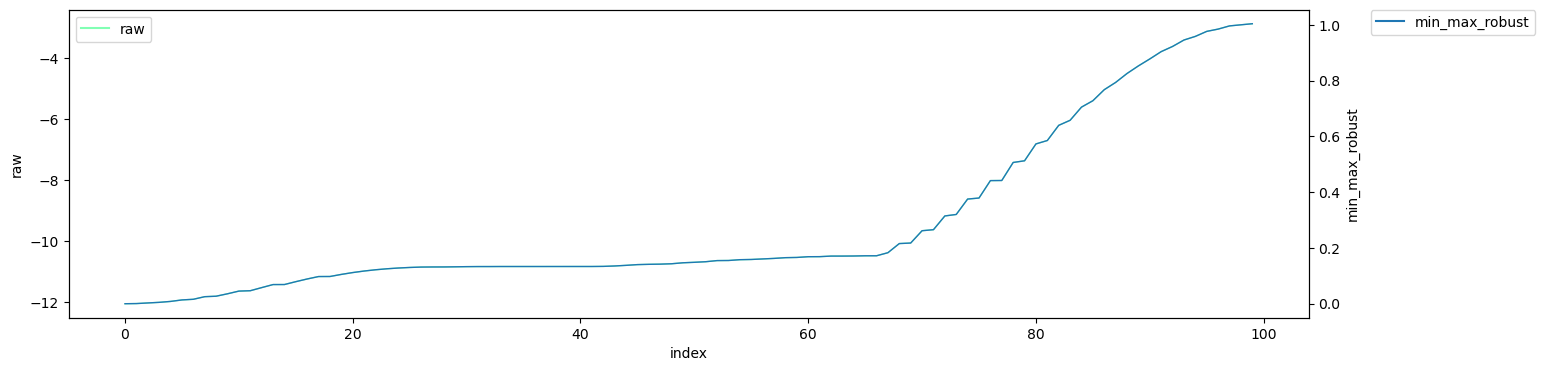

time: 2.06 s


In [17]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.min_max_robust )

In [18]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73


time: 374 ms


## scale method='rel'
* scales every value with a fixed factor so that
* `series_scaled.sum() == 1`  or  `series_scaled.sum() == -1` 
* therefore, this scaling is well suited for frequencies, the numerical values are then the relative frequencies
* `series_scaled.min()`  and  `series_scaled.max()` are numbers near `0`

In [19]:
# scale
df['rel'] = pak.scale( df.raw, method='rel')

time: 350 ms


In [20]:
# assert
assert abs( abs(df.rel.sum()) - 1 ) < 0.000000001  # .sum() == 1 or -1

time: 395 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

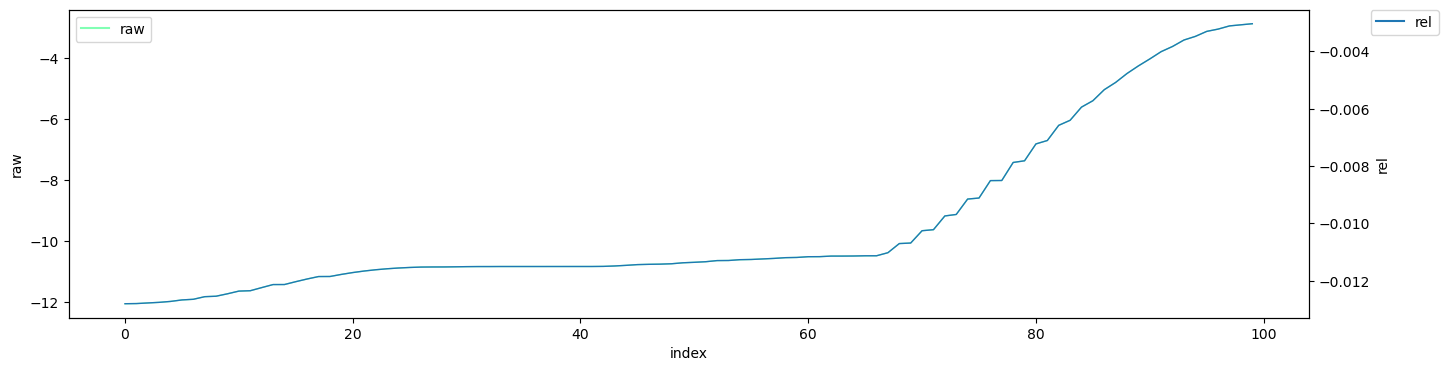

time: 2.27 s


In [21]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.rel)

In [22]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00


time: 395 ms


## scale method='mean'
* also called z-score
* one finds: `series_scaled.mean() == 0` 
* one finds: `series_scaled.std()  == 1` 
* a typical range for the scaled values is `-1.7..1.7`

In [23]:
# scale
df['mean_'] = pak.scale( df.raw, 'mean')

time: 405 ms


In [24]:
# assert
assert abs( df.mean_.mean() )    < 0.000000001   # mean() == 0
assert abs( df.mean_.std() - 1 ) < 0.000000001   # std()  == 1

time: 434 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

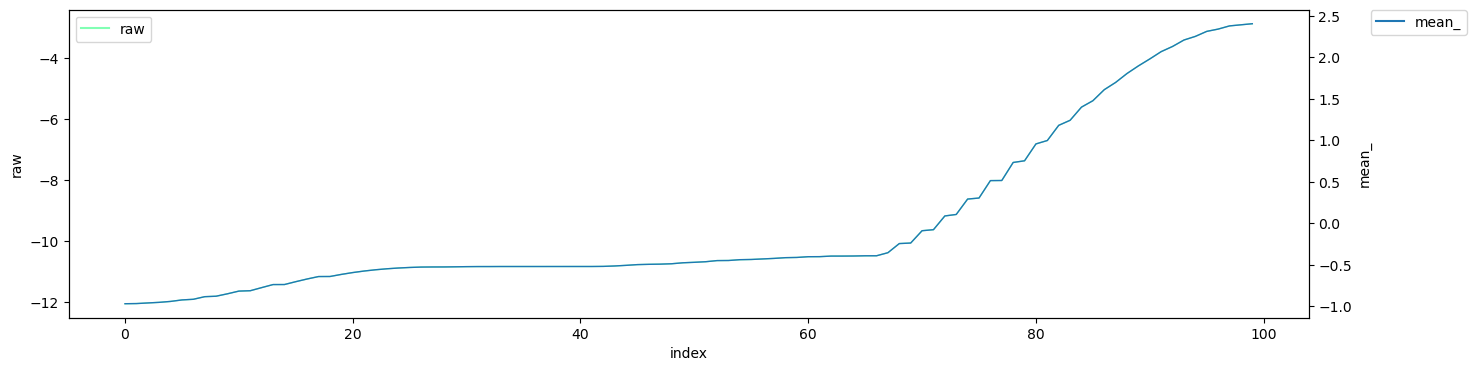

time: 2.12 s


In [25]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.mean_ )

In [26]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00
mean_,-0.97,-0.00,-0.47,2.41,-0.00


time: 453 ms


## scale method='median'
* like `mean`, but more robust against outliner values.
* one finds: `series_scaled.median() == 0` 
* a typical range for the scaled values is `-1..1`, 
  but the range can be much wider than with `mean`

In [27]:
# scale
df['median_'] = pak.scale( df.raw, 'median')

time: 373 ms


In [28]:
# assert
assert abs( df.median_.median() )  < 0.000000001   # median() == 0

time: 358 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

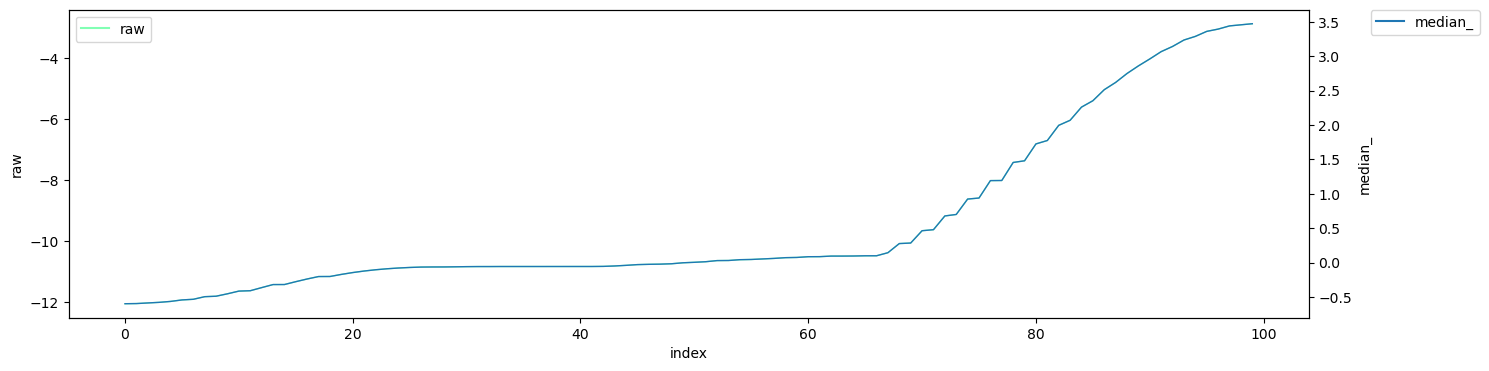

time: 1.88 s


In [29]:
# display (plots are on top of each other, see scaling on both y-axis)
pak.plot(df.raw, df.median_ )

In [30]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00
mean_,-0.97,-0.00,-0.47,2.41,-0.00
median_,-0.60,0.57,0.00,3.47,56.80


time: 373 ms


## scale method='compare_median'
* scales `0..1` below median and `1..` above median 
* So you can multipy the scaled values by any factor, keeping the comparison to the median.
* one finds: all values < median are `0..1`
* one finds: all values == median are `1`
* one finds: all values > median are `> 1`
* `series_scaled.median()` will be very near `1`.
* unlike most other scalings, the plots do not lie on top of each other, but have a different shape

In [31]:
# scale
df['compare_median'] = pak.scale( df.raw, 'compare_median') 

time: 675 ms


In [32]:
# assert
assert df.compare_median.min() == 0

mask = (df.raw > df.raw.median())
assert (df[mask].compare_median > 1).all()

mask = (df.raw == df.raw.median())
assert (df[mask].compare_median == 1).all()

mask = (df.raw < df.raw.median())
assert (df[mask].compare_median <= 1).all()
assert (df[mask].compare_median >= 0).all()

time: 395 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

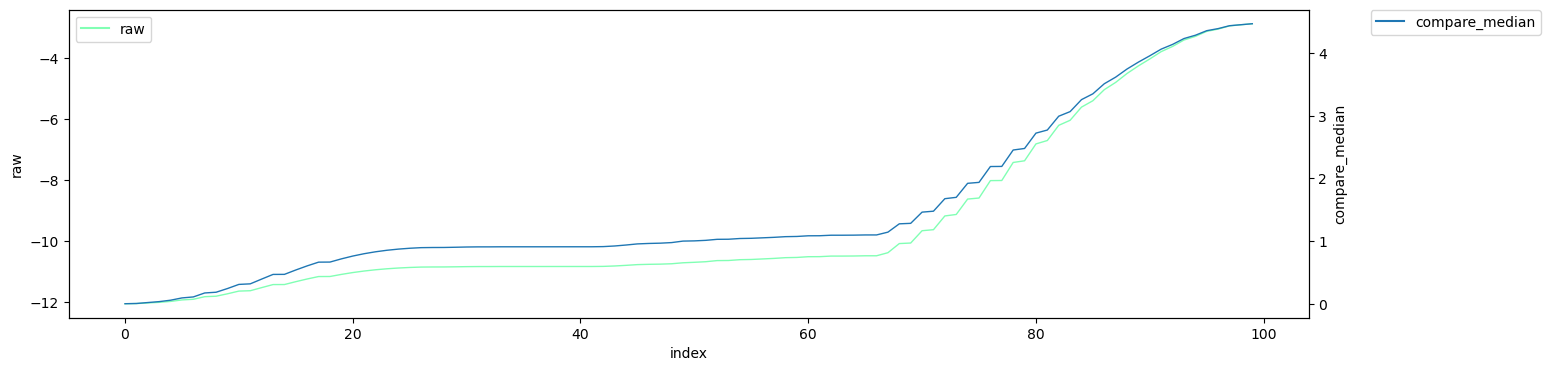

time: 2.53 s


In [33]:
# display
pak.plot(df.raw, df.compare_median )

In [34]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00
mean_,-0.97,-0.00,-0.47,2.41,-0.00
median_,-0.60,0.57,0.00,3.47,56.80
compare_median,0.00,1.50,1.00,4.47,150.16


time: 372 ms


## scale method='rank'
* scales `0..1` (open interval)
* scales by rank
* distributes evenly over the interval, the original shape is destroyed. The plots do not lie on top of each other.
* if powerfactor == 1 one finds: `series_scaled.median() == 0.5` 
* additional parameter powerfactor deforms the scale, see example

In [35]:
# scale
df['rank1'] = pak.scale( df.raw, 'rank')

time: 554 ms


In [36]:
# assert
assert (df.rank1 > 0).all()
assert (df.rank1 < 1).all()

assert df.rank1.min() < 0.01
assert df.rank1.max() > 0.99
assert abs(df.rank1.quantile(0.5) - 0.5) < 0.02

time: 413 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

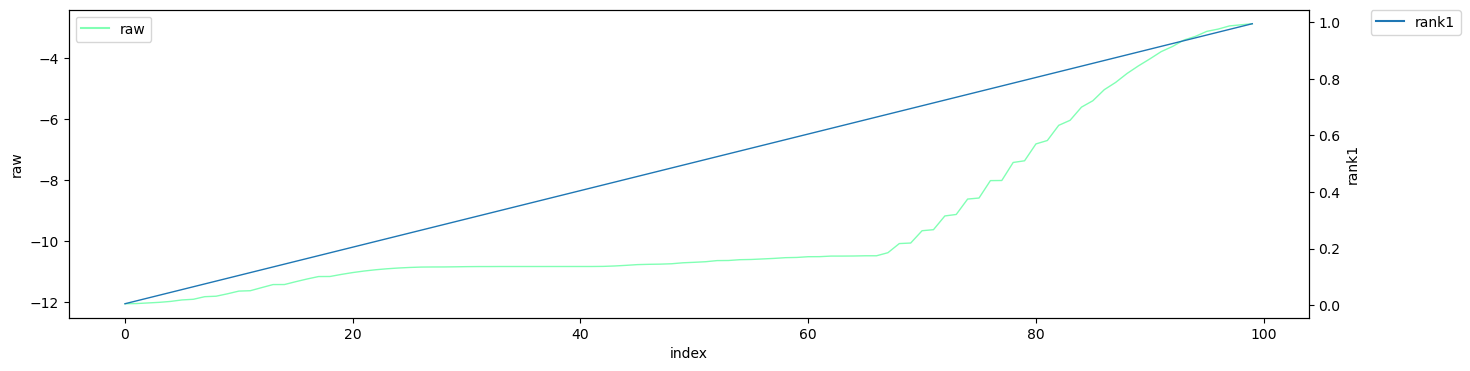

time: 2.17 s


In [37]:
# display
pak.plot( df.raw, df.rank1)

In [38]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00
mean_,-0.97,-0.00,-0.47,2.41,-0.00
median_,-0.60,0.57,0.00,3.47,56.80
compare_median,0.00,1.50,1.00,4.47,150.16
rank1,0.01,0.50,0.50,0.99,50.00


time: 576 ms


In [39]:
# scale with powerfactor
df['rank3'] = pak.scale( df.raw, 'rank', powerfactor=3)

time: 705 ms


In [40]:
# assert
assert (df.rank3 >= 0).all()
assert (df.rank3 <= 1).all()

time: 441 ms


findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

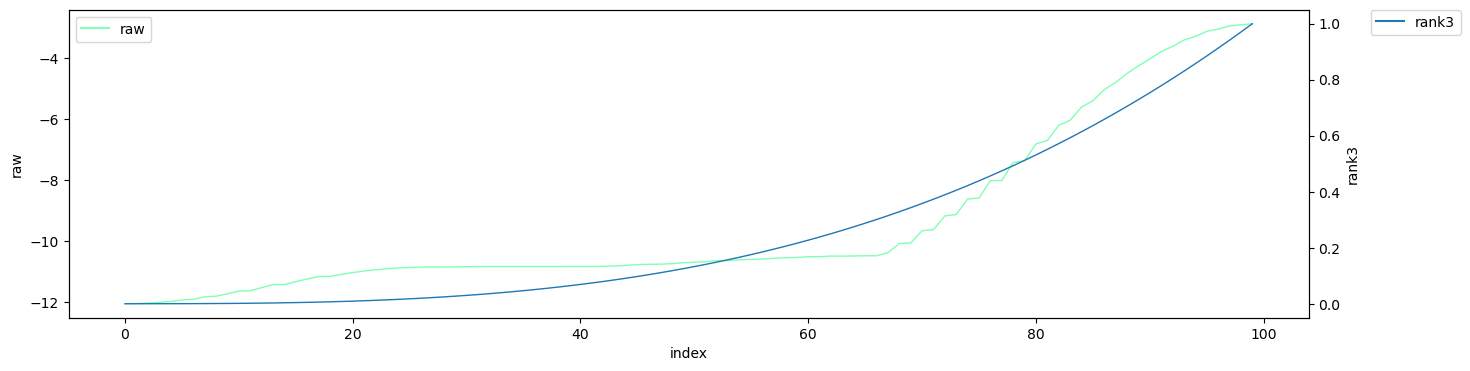

time: 2.18 s


In [41]:
pak.plot( df.raw, df.rank3)

In [42]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00
mean_,-0.97,-0.00,-0.47,2.41,-0.00
median_,-0.60,0.57,0.00,3.47,56.80
compare_median,0.00,1.50,1.00,4.47,150.16
rank1,0.01,0.50,0.50,0.99,50.00


time: 440 ms


## scale method='random'
* scales randomly
* generates an ugly, krank scaling for testings

## Comparison

findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'Heiti TC'

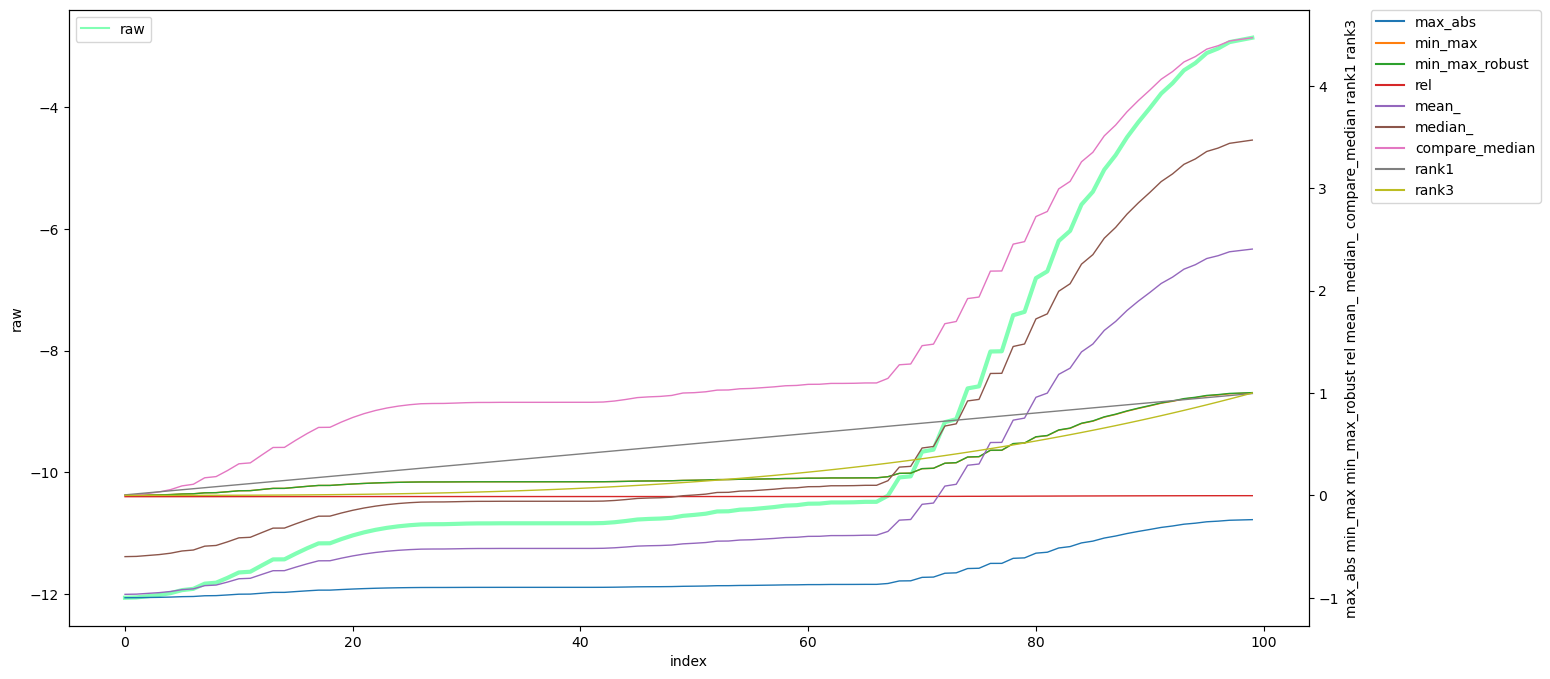

time: 4.5 s


In [43]:
spalten1 = ['raw']
spalten2 = list(analyse().index)[1:]
pak.plot( df[spalten1], df[spalten2], size=(16,8), line=(3,1))

In [44]:
analyse()

,vmin,vmean,vmedian,vmax,vsum
col_name,,,,,
raw,-12.06,-9.42,-10.71,-2.86,-942.38
max_abs,-1.00,-0.78,-0.89,-0.24,-78.14
min_max,0.00,0.29,0.15,1.00,28.66
min_max_robust,-0.00,0.29,0.15,1.00,28.73
rel,-0.01,-0.01,-0.01,-0.00,-1.00
mean_,-0.97,-0.00,-0.47,2.41,-0.00
median_,-0.60,0.57,0.00,3.47,56.80
compare_median,0.00,1.50,1.00,4.47,150.16
rank1,0.01,0.50,0.50,0.99,50.00


time: 412 ms
